In [21]:
%widescreen
from visual_behavior import database as db
import matplotlib.pyplot as plt
import imageio
import datetime
import bson
import shutil

In [2]:
annotation_folder = '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/lick_detection_validation/reannotation'
def populate_annotation_summary():
    '''
    make one entry in 'annotation_summary' for every filename
    only needs to be run if new data is added to annotation folder
    '''
    conn = db.Database('visual_behavior_data')
    collection = conn['lick_detection_validation']['annotation_summary']
        
    annotation_folder = '/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/lick_detection_validation/reannotation'
    folders = os.listdir(annotation_folder)
    for folder in folders:
        filenames = os.listdir(os.path.join(annotation_folder,folder))
        for filename in filenames:
            document = {
                'filename':filename,
                'folder':folder,
            }
            db.update_or_create(
                collection,
                document,
                keys_to_check = ['filename']
            )
    conn.close()

In [19]:
populate_annotation_summary()

In [3]:
def get_annotation_summary():
    conn = db.Database('visual_behavior_data')
    collection = conn['lick_detection_validation']['annotation_summary']
    annotation_summary = pd.DataFrame(list(collection.find({}))).fillna(0)
    conn.close()
    return annotation_summary


In [4]:
def get_sample():
    annotation_summary = get_annotation_summary()
    max_annotations = annotation_summary['n_annotations'].max()
    return annotation_summary.query('n_annotations <= @max_annotations').sample().iloc[0]

oeid_892805315__frame_77550.png


Text(0.5, 1.0, 'oeid_892805315__frame_77550.png')

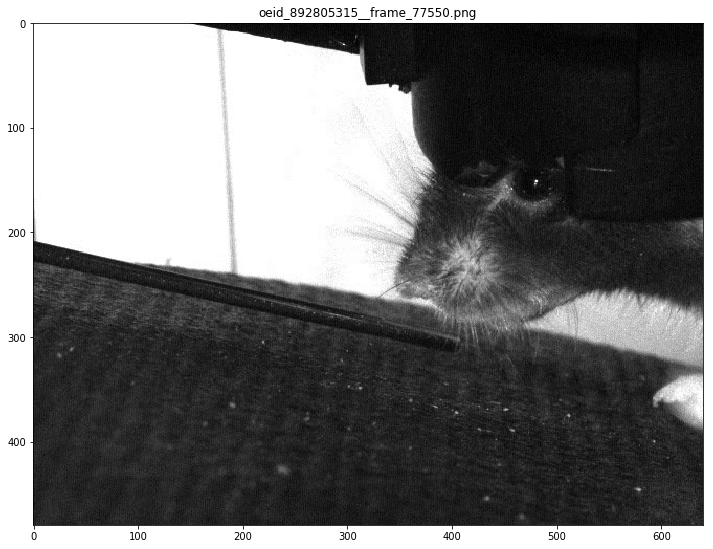

In [348]:
fig,ax=plt.subplots(figsize=(12,10))
sample = get_sample()
id_string = str(sample['_id'])
print(sample['filename'])
ax.imshow(imageio.imread(os.path.join(annotation_folder,sample['folder'],sample['filename'])))
ax.set_title(sample['filename'])

In [6]:
conn = db.Database('visual_behavior_data')

In [271]:
annotation_summary = get_annotation_summary()

In [274]:
annotation_summary[annotation_summary['_id'] == bson.ObjectId('5eb34e12a220d583602ba7f7')]

,_id,filename,folder,n_annotations,most_recent_annotation_record_id
14397,5eb34e12a220d583602ba7f7,oeid_911149119__frame_40297.png,tongue,0.0,NaN


In [277]:
collection=conn['lick_detection_validation']['annotation_records']
annotations = pd.DataFrame(list(collection.find({}))).sort_values(by='timestamp',ascending=False)

In [278]:
annotations.sort_values(by='timestamp')

,_id,username,ip,session_id,filename,frame_number,ophys_or_ephys,timestamp,annotation_label
0,5eb3b71b483fb92a484c9f29,dougo,unknown,817029623,oeid_817267860__frame_81218.png,81218,ophys,2020-05-07 00:22:03.524735,no_contact
1,5eb3b722483fb92a484c9f33,dougo,unknown,910971181,oeid_911149119__frame_28764.png,28764,ophys,2020-05-07 00:22:10.858036,lick_with_contact
2,5eb3b726483fb92a484c9f3d,dougo,unknown,845840207,oeid_846487947__frame_68962.png,68962,ophys,2020-05-07 00:22:14.499229,no_contact
3,5eb3b7b4483fb92a484c9f58,dougo,unknown,935554523,oeid_936494970__frame_90956.png,90956,ophys,2020-05-07 00:24:36.862654,no_contact
4,5eb3b7bc483fb92a484c9f62,dougo,unknown,819949602,oeid_820307518__frame_57390.png,57390,ophys,2020-05-07 00:24:44.031489,groom_reach_with_contact
...,...,...,...,...,...,...,...,...,...
8945,5ebc2c91a0fff3b293897764,dougo,10.71.51.49,963496285,oeid_964440177__frame_50080.png,50080,ophys,2020-05-13 10:21:21.231008,lick_with_contact
8946,5ebc2cb6a0fff3b29389776d,dougo,10.71.51.49,845840207,oeid_846487947__frame_98825.png,98825,ophys,2020-05-13 10:21:58.188701,no_contact
8947,5ebc2cf50eac3344d697f570,dougo,10.71.51.49,841043477,oeid_841594637__frame_36269.png,36269,ophys,2020-05-13 10:23:01.970780,no_contact
8948,5ebc2d230eac3344d697f579,dougo,10.71.51.49,932662051,oeid_933338703__frame_80210.png,80210,ophys,2020-05-13 10:23:47.243046,lick_with_contact


In [24]:
for idx,row in annotations.iterrows():
    shutil.copy(os.path.join(annotation_folder, row['folder'],row['filename']),os.path.join(annotation_folder, 'temp'))

In [23]:
shutil.copy(os.path.join(annotation_folder, row['folder'],row['filename']),os.path.join(annotation_folder, 'temp'))

'/allen/programs/braintv/workgroups/nc-ophys/visual_behavior/lick_detection_validation/reannotation/temp/oeid_808621958__frame_44320.png'

In [43]:
for filename in os.listdir(os.path.join(annotation_folder, 're-annotate')):
    res = annotations.query('filename == @filename')
    for idx,row in res.iterrows():
        conn['lick_detection_validation']['annotation_records'].update_one(
            {'_id':row['_id']},
            {"$set": {'annotation_label': 'paw_contact','username':'dougo'}}
        )


In [42]:
conn['lick_detection_validation']['annotation_records'].find_one({'_id':res['_id'].iloc[0]})

{'_id': ObjectId('5eb47538bd65e4bda453cf08'),
 'username': 'dougo',
 'ip': 'unknown',
 'session_id': 817101568,
 'filename': 'oeid_817267785__frame_125060.png',
 'frame_number': 125060,
 'ophys_or_ephys': 'ophys',
 'timestamp': '2020-05-07 13:53:12.012266',
 'annotation_label': 'paw_contact'}

In [44]:
conn['lick_detection_validation']['annotation_records'].find_one({'_id':res['_id'].iloc[0]})
                                                                                              

{'_id': ObjectId('5eb470c1bd65e4bda453c19d'),
 'username': 'dougo',
 'ip': 'unknown',
 'session_id': 794078109,
 'filename': 'oeid_794389498__frame_7610.png',
 'frame_number': 7610,
 'ophys_or_ephys': 'ophys',
 'timestamp': '2020-05-07 13:34:09.029138',
 'annotation_label': 'paw_contact'}

In [47]:
annotations['username'].value_counts()

dougo      1870
unknown      69
taminar      52
corbett      52
kater        12
peterg        2
Name: username, dtype: int64

In [48]:
def update_leaderboard():
    '''
    get annotator summary, generate leaderboard dataframe
    '''
    conn = db.Database('visual_behavior_data')
    collection=conn['lick_detection_validation']['annotators']
    all_annotators = pd.DataFrame(list(collection.find({}))).sort_values(by='annotation_count',ascending=False)
    conn.close()
    return all_annotators[['annotation_count','username']].rename(columns={'annotation_count':'count  '})

update_leaderboard()

,count,username
0,2853,dougo
6,418,katn
3,217,peterg
1,70,unknown
5,57,taminar
4,55,corbett
2,12,kater


In [63]:
conn = db.Database('visual_behavior_data')
collection=conn['lick_detection_validation']['annotators']
all_annotators = pd.DataFrame(list(collection.find({}))).sort_values(by='annotation_count',ascending=False)
conn.close()

In [66]:
all_annotators

,_id,username,ip_list,annotation_count
0,5eb35a6ea220d583602bbd3e,dougo,"[unknown2, unknown, 10.71.51.49]",5944
6,5eb58de4db3465bf0d85d090,katn,[unknown],2125
3,5eb44bb5be84629836f6e0e8,peterg,[unknown],310
1,5eb42960fdd27cca8e3c8e22,unknown,[unknown],168
5,5eb4614a3e98a089162ce173,taminar,[unknown],82
7,5eb59fb1db3465bf0d85fb3b,paul.rhoads,[unknown],79
4,5eb45df33e98a089162cdf00,corbett,[unknown],55
8,5eb5d423db3465bf0d865ab7,marinag,[unknown],32
2,5eb445e5be84629836f6ddd7,kater,[unknown],12


In [71]:
def get_user_for_ip(ip_addr):
    conn = db.Database('visual_behavior_data')
    collection=conn['lick_detection_validation']['annotators']
    all_annotators = pd.DataFrame(list(collection.find({}))).sort_values(by='annotation_count',ascending=False)
    conn.close()
    for idx, row in all_annotators.iterrows():
        if '10.71.51.49' in row['ip_list']:
            return row['username']
        else:
            return None
get_user_for_ip('10.71.51.49')

'dougo'

In [297]:
annotations = pd.DataFrame(list(conn['lick_detection_validation']['annotation_records'].find({})))

In [298]:
annotations.groupby('username')['annotation_label'].value_counts(normalize=True)

username     annotation_label           
             no_contact                     1.000000
beno         no_contact                     0.472511
             lick_with_contact              0.257058
             lick_without_contact           0.127786
             paw_contact                    0.049034
             groom_reach_with_contact       0.046062
             ambiguous                      0.023774
             groom_reach_without_contact    0.023774
chelsean     no_contact                     0.541635
             lick_with_contact              0.190985
             lick_without_contact           0.169213
             ambiguous                      0.071047
             groom_reach_with_contact       0.022918
             groom_reach_without_contact    0.002674
             paw_contact                    0.001528
conorg       no_contact                     0.522388
             lick_with_contact              0.304478
             lick_without_contact           0.062687
     

In [72]:
def get_entry(id_string):
    '''
    get document for one frame from the annotation summary collection
    '''
    conn = db.Database('visual_behavior_data')
    collection = conn['lick_detection_validation']['annotation_summary']
    entry = collection.find_one({'_id': bson.ObjectId(id_string)})
    if 'n_annotations' not in entry.keys():
        entry.update({'n_annotations': 0})
    conn.close()
    return entry

In [81]:
entry = get_entry('5eb34ddba220d583602b8b0b')


Text(0.5, 1.0, 'oeid_842973730__frame_7888.png')

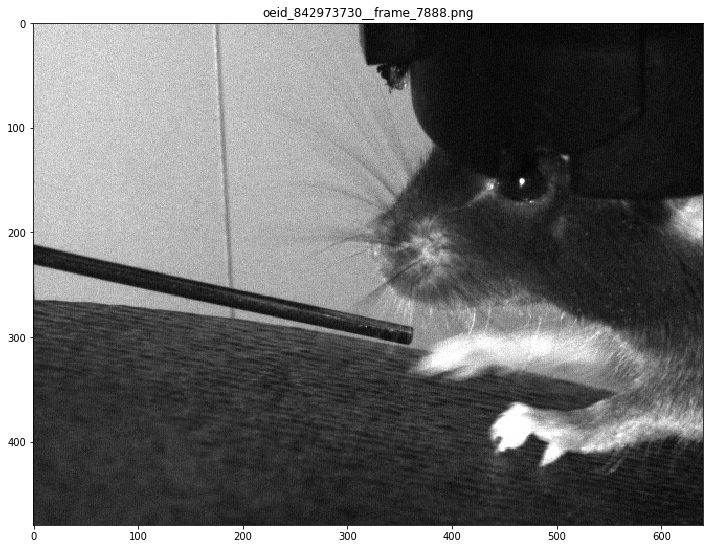

In [82]:
fig,ax=plt.subplots(figsize=(12,10))
ax.imshow(imageio.imread(os.path.join(annotation_folder,entry['folder'],entry['filename'])))
ax.set_title(entry['filename'])

In [264]:

def benchmark():
    '''
    get the full annotation summary table from mongo
    '''
    conn = db.Database('visual_behavior_data')
    collection = conn['lick_detection_validation']['annotation_summary']
    df = pd.DataFrame(list(collection.find({'n_annotations':1})))
    conn.close()
    return df

def get_annotation_summary():
    '''
    get the full annotation summary table from mongo
    '''
    conn = db.Database('visual_behavior_data')
    collection = conn['lick_detection_validation']['annotation_summary']
    annotation_summary = pd.DataFrame(list(collection.find({})))# .fillna(0)
    conn.close()
    return annotation_summary

def get_min_annotations():
    conn = db.Database('visual_behavior_data')
    res = conn['lick_detection_validation']['annotation_summary'].find_one(sort=[("n_annotations", 1)])
    conn.close()
    if 'n_annotations' in res.keys():
        return int(res['n_annotations'])
    else:
        return 0
    
def get_sample_id():
    '''
    get one random sample frame
    choose among the frames that have been sampled the least to ensure even sampling
    this will ensure all frames get annotated once before any get annotated a second time
    '''
    conn = db.Database('visual_behavior_data')
    res = conn['lick_detection_validation']['annotation_summary'].find_one(sort=[("n_annotations", 1)])
    if 'n_annotations' in res.keys():
        min_annotations = int(res['n_annotations'])
    else:
        min_annotations = 0
    res = conn['lick_detection_validation']['annotation_summary'].aggregate([
        { '$match': { 'n_annotations': min_annotations } },
        { '$sample': { 'size': 1 } }
    ])
    ans = list(res)
    conn.close()
    return str(ans[0]['_id'])

In [268]:
%%time
_id = get_sample_id()


CPU times: user 4.54 ms, sys: 4.59 ms, total: 9.13 ms
Wall time: 72.6 ms


In [256]:
_id

'5eb34e02a220d583602ba02f'

In [249]:
%%time
get_sample()

CPU times: user 112 ms, sys: 9.25 ms, total: 121 ms
Wall time: 166 ms


_id                                         5eb34e25a220d583602bb09b
filename                            oeid_933338703__frame_114855.png
folder                                                        tongue
n_annotations                                                      0
most_recent_annotation_record_id                                 NaN
Name: 16609, dtype: object

In [395]:
annotation_summary = get_annotation_summary()

In [396]:
annotation_summary['n_annotations'].value_counts()

1.0    19701
2.0       84
3.0        1
Name: n_annotations, dtype: int64

In [206]:
%%time
get_min_annotations()

CPU times: user 8.9 ms, sys: 1.63 ms, total: 10.5 ms
Wall time: 15.4 ms


0

[{'_id': ObjectId('5eb34dbfa220d583602b7b95'),
  'filename': 'oeid_842975542__frame_104941.png',
  'folder': 'no_contact',
  'n_annotations': 0}]

In [374]:
annotation_summary = get_annotation_summary()
annotation_summary['n_annotations'].value_counts()

1.0    16222
0.0     3500
2.0       63
3.0        1
Name: n_annotations, dtype: int64

In [223]:
annotation_summary = get_annotation_summary()
for idx,row in annotation_summary[pd.isnull(annotation_summary['n_annotations'])].iterrows():
    _id = row['_id']
    conn['lick_detection_validation']['annotation_summary'].update_one(
        {'_id':bson.ObjectId(_id)}, 
        {"$set": {'n_annotations':0}}
    )

In [110]:
get_annotation_summary().sort_values(by='n_annotations').tail(50)

,_id,filename,folder,n_annotations,most_recent_annotation_record_id
13703,5eb34e0ca220d583602ba541,oeid_887357514__frame_35903.png,tongue,2.0,5eb4a808db3465bf0d85a2c2
19751,5eb34e43a220d583602bbce1,oeid_892801488__frame_33336.png,paw,2.0,5eb424309f3ef3d9c57e63c1
486,5eb34db3a220d583602b71a0,oeid_965930965__frame_91755.png,no_contact,2.0,5eb70956db3465bf0d865fe0
12815,5eb34e05a220d583602ba1c9,oeid_919325908__frame_75144.png,tongue,2.0,5eb71f3fdb3465bf0d867073
16372,5eb34e22a220d583602bafae,oeid_974384470__frame_103832.png,tongue,2.0,5eb4598d3e98a089162cd914
2308,5eb34dbba220d583602b78be,oeid_845037476__frame_102294.png,no_contact,2.0,5eb45a223e98a089162cdb45
11947,5eb34dffa220d583602b9e65,oeid_878358326__frame_13263.png,no_contact,2.0,5eb463653e98a089162ce331
6953,5eb34ddba220d583602b8ae3,oeid_842975542__frame_111023.png,no_contact,2.0,5eb450f1be84629836f6e734
7496,5eb34ddfa220d583602b8d02,oeid_794389498__frame_97389.png,no_contact,2.0,5eb432b9330732eb966ff285
13970,5eb34e0ea220d583602ba64c,oeid_967906375__frame_64833.png,tongue,2.0,5eb72089db3465bf0d867374


In [294]:
# annotations = pd.DataFrame(list(conn['lick_detection_validation']['annotation_records'].find({})))
# for idx,row in annotations.query('username == "beno"').iterrows():
#     filename = row['filename']
#     _id = str(annotation_summary.query('filename == "{}"'.format(filename))['_id'].iloc[0])
#     entry = get_entry(_id)
#     fig,ax=plt.subplots(figsize=(12,10))
#     ax.imshow(imageio.imread(os.path.join(annotation_folder,entry['folder'],entry['filename'])))
#     ax.set_title('{}  annotation = {}'.format(entry['filename'], row['annotation_label']))

In [291]:
filename = 'oeid_833631932__frame_25158.png'


{'_id': ObjectId('5eb34e14a220d583602ba949'),
 'filename': 'oeid_833631932__frame_25158.png',
 'folder': 'tongue',
 'n_annotations': 1,
 'most_recent_annotation_record_id': '5ebc3b6d9216c957db15e3ea'}

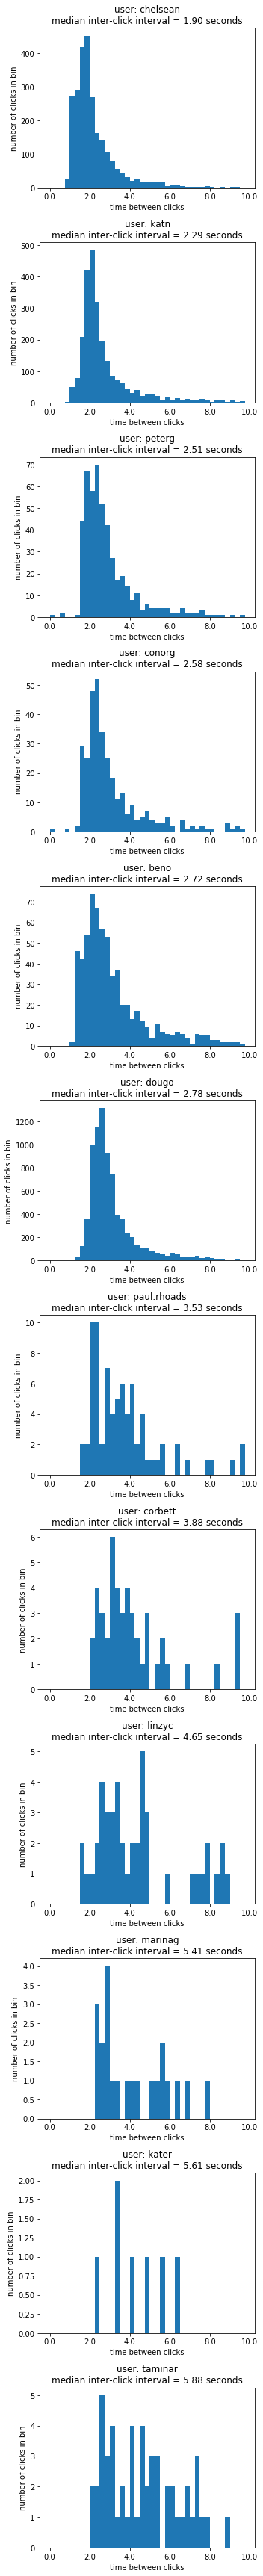

In [373]:
users = sorted([user for user in annotations['username'].unique() if user not in ['unknown','',None]])
user_speed = {}
user_vals = {}
for row,user in enumerate(users):
    user_vals[user] = annotations.query('username == @user')['timestamp'].map(pd.to_datetime).diff().dropna().dt.total_seconds() 
    user_speed[user] = np.median(user_vals[user])
fig,ax = plt.subplots(len(users),1,figsize=(5,4*len(users)))
for row,(user,speed) in enumerate(sorted(user_speed.items(), key=lambda x: x[1])):
    ax[row].hist(user_vals[user],bins=np.arange(0,10,0.25),normed=False)
    ax[row].set_title('user: {}\nmedian inter-click interval = {:0.2f} seconds'.format(user,speed))
    ax[row].set_xticks(np.arange(0,10.1,2))
    ax[row].set_xticklabels(np.arange(0,10.1,2))
    ax[row].set_xlabel('time between clicks')
    ax[row].set_ylabel('number of clicks in bin')
fig.tight_layout()

In [362]:
user_speed

{'beno': 2.723604,
 'chelsean': 1.9012040000000001,
 'conorg': 2.583279,
 'corbett': 3.884459,
 'dougo': 2.777584,
 'kater': 5.607477,
 'katn': 2.2873285,
 'linzyc': 4.64536,
 'marinag': 5.41216,
 'paul.rhoads': 3.534921,
 'peterg': 2.513426,
 'taminar': 5.880276500000001}

In [365]:
for user,speed in sorted(user_speed.items(), key=lambda x: x[1]):
    print(user,speed)

chelsean 1.9012040000000001
katn 2.2873285
peterg 2.513426
conorg 2.583279
beno 2.723604
dougo 2.777584
paul.rhoads 3.534921
corbett 3.884459
linzyc 4.64536
marinag 5.41216
kater 5.607477
taminar 5.880276500000001


In [ ]:
datetime.datetime.tot